<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/Intro_plotting_fitting_python_6765.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to using Python for Biochem 6765 - SP20; Foster

## Simple plotting and fitting with Python, using matplotlib and pandas
We will start with a cooperative isotherm of oxygen binding to hemoglobin. The data as follows, in which the first column is oxygen partial pressure (in mmHg), and the second is fractional saturation:
```
0.499	0.000
1.341	0.015
2.106	0.030
5.345	0.146
7.934	0.316
11.132	0.505
14.761	0.644
18.499	0.760
25.233	0.919
64.028	0.995
```
We plot the data using `matplotlib` https://matplotlib.org/ (a library with functionality similar to that of MATLAB), we define _x_ and _y_ data. This can be done manually, as ...

Text(0, 0.5, 'Saturation')

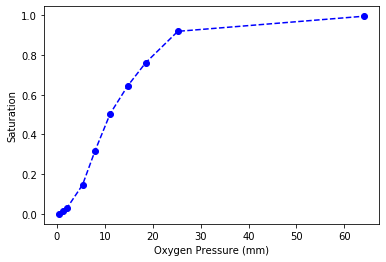

In [0]:
# import matplotlib library for MATLAB-like plotting
import matplotlib.pyplot as plt  # this library has the plotting tools
# enter the data manually
x = [0.499,  1.341,  2.106,  5.345,  7.934,  11.132,  14.761,  18.499,  25.233,
     64.028]
y = [0.0, 0.015, 0.03, 0.146, 0.316, 0.505, 0.644, 0.76, 0.919, 0.995]
# then plot the data: 
plt.plot(x,y, 'bo--') # 'bo--' means *b*lue 'o's and dashes
plt.xlabel('Oxygen Pressure (mm)')
plt.ylabel('Saturation')
#import numpy as np

Usually, our data is in some file. We can most easily read in the data using the `pandas` package, https://pandas.pydata.org/. Pandas simplifies loading tabular data into a "data frame"; basically a table with rows and columns. For this example, the data are available on the web as a space-separated text file, at this URL: https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/hb+o2.txt . The first line of the file is a comment, so we will need to tell pandas to ignore lines that start with `comment='#'`, that the separator between fields is blank space `sep='\s+'`, and that the file does not have a reader row, `header=None`.

In [0]:
# use pandas to load the data from a url
import pandas as pd
df = pd.read_table("https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/hb+o2.txt",
                   sep='\s+', header=None, comment='#')
df.columns = ['PO2','Ys']  # rename columns; 0 is oxygen pressure; 1 is saturation
df  # print out the data frame

,PO2,Ys
0,0.499,0.000
1,1.341,0.015
2,2.106,0.030
3,5.345,0.146
4,7.934,0.316
5,11.132,0.505
6,14.761,0.644
7,18.499,0.760
8,25.233,0.919
9,64.028,0.995


and... easily plot the data using funtions associated with a pandas data frame:

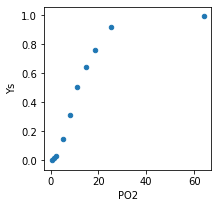

In [0]:
df.plot('PO2', 'Ys', kind='scatter', figsize=(3,3)) # plot the data using a scatter plot

NB: we can convert a column in a data frame to a list:

In [0]:
df['Ys'].tolist() # print a column as a list

[0.0, 0.015, 0.03, 0.146, 0.316, 0.505, 0.644, 0.76, 0.919, 0.995]

## Fitting to a model
OK, we have loaded and plotted the binding data. It's common to interpret cooperative binding of multiple ligands to a macromolecule using the Hill equation: 

<img src="https://latex.codecogs.com/svg.latex?\Large&space;Y=\frac{[L]^n}{[L]^n+K_D^2}" title="\Large Y=\frac{[L]^n}{[L]^n+K_D^n}" />

where _n_ is the Hill coefficient. We will use the `lmfit` package https://lmfit.github.io/lmfit-py/ to generate the model and perfom fitting. `lmfit` is not a standard package in most python installations (it is built on other packages, especially `numpy` and `scipy`), and therefore needs to be installed. In a Jupyter Notebook, this can be accomplished by:
```
!pip install lmfit
```


In [0]:
# install lmfit
!pip install lmfit
from lmfit import Model, Parameter, report_fit  # import the desired components
import numpy as np  

     |████████████████████████████████| 266kB 4.8MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 235kB 18.4MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.0-cp36-none-any.whl size=87915 sha256=d74f87d53376d187799643a33398b49e5244ec64a39d57a35980aea8c0bb716e
  Stored in directory: /root/.cache/pip/wheels/1f/93/e9/8d3f759e466f5bbfed3ba1d7dc5b3d4389c469a1ec9a2acaee
  Created wheel for asteval: filename=asteval-0.9.18-cp36-none-any.whl size=17382 sha256=fdd2d8bf6141d0fc55d1fa7acef57baa07801de75b5fba423410c3e18a899d74
  Stored in directory: /root/.cache/pip/wheels/1c/53/1b/28d929700c9633b1786a4982e6db564ec8326a8930234dcc19
  Created wheel for uncertainties: filename=uncertainties-3.1.2-cp36-none-any.whl size=96458 sha256=861c04d95094e1025a7fcea9a404f2c06655b78845a4f3dc339e349acffea04c
  Stored in directory: /root/.cache/pip/wheels/d9/d3/0e/5b0b743a8abd50373705427438456da5dc2621891138d7a618
Successfully built lmfit asteval uncertainties

In [0]:
def Hill(x, n, Kd): # the Hill equation
    return x**n/(x**n + Kd**n) 

x = df['PO2']
data = df['Ys']
#simdata = Hill(x,4,10)
#simdata
#plt.plot(x,simdata)

In [0]:
hmodel = Model(Hill, independent_vars=['x'])
hmodel
hmodel.param_names
result = hmodel.fit(data, x=x, n=4, Kd=1)
result

Next, we plot the data, along with the best-fit model, and the residuals; ALWAYS visually inspect the data, fit and residuals before interpreting parameters.

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

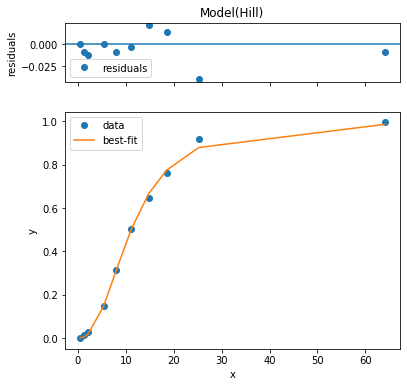

In [0]:
result.plot()

## Plotting multi-column data with pandas
Now, lets load some mulit-column data from the web, at this url: 
https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/example1.txt

In [3]:
import pandas as pd
df = pd.read_table("https://www.asc.ohio-state.edu/foster.281/gnuplot/gnuplot_tutorial1_files/example1.txt",sep='\s+', header=None, comment='#')
df.head()

,0,1,2,3
0,0,1.0000,5.000000,0.006738
1,1,0.5000,5.000977,0.005761
2,2,0.2500,5.003171,0.003567
3,3,0.1250,5.004790,0.001948
4,4,0.0625,5.005724,0.001014


We could issue a series of matplotlib sub-plot commands to separately plot the data in each column.... or, as here we will make use of built-in sub-plotting in pandas:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ca9620710>,
      dtype=object)

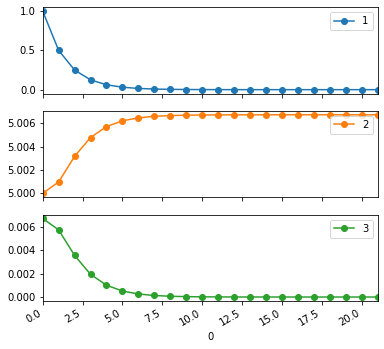

In [6]:
df.plot(x=0, y=[1,2,3], subplots='true', marker='o', figsize=[6,6]) # we specify which column has the x-axis, then a list of y axes to plot.

## Generating synthetic data using NumPy
Sometimes it's useful to simulate numerical data; numpy is just the right tool for this. We will start by plotting a simple sine function of the form _y = sin(x)_

In [0]:
# import necessary packages and libraries
import numpy as np
import matplotlib.pyplot as plt

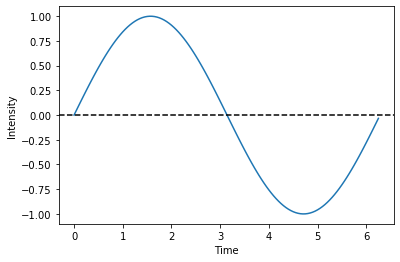

In [36]:
x = np.arange(0,np.pi*2,0.05) # generate x values from 0 to 2pi in step of 0.05
y = np.sin(x) # compute y values
plt.plot(x,y, '-')
plt.ylabel('Intensity')
plt.xlabel('Time')
plt.axhline(ls='--',c='k')

Next, we simulate a first-order exponential decay of the form _Y = exp(-t/tau)_. We will create the function, `decay`, and use it to compute the _y_ values:

Text(0, 0.5, 'Intensity')

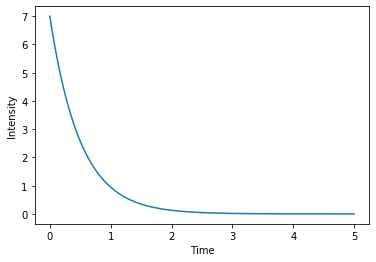

In [39]:
# define a function to y values for an array of x values
def decay(t, N, tau):
    return N*np.exp(-t/tau)

# create a vector of x values
t = np.linspace(0, 5, num=1000) # this generates the array t, with values from 0 to 5, in 1000 increments
# now compute the y values
N = 7 # intensity at time 0
tau = 0.5 # decay rate
data = decay(t, N, tau)
plt.plot(t,data)
plt.xlabel('Time')
plt.ylabel('Intensity')

## Simulate data, with noise...
Real experimental data is always noisy. We can simulated this noise using random numbers. We use the `decay` function and variables defined above...

Text(0, 0.5, 'y')

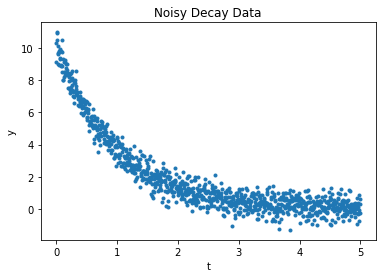

In [94]:
# define a "noisy" function to y values for an array of x values
def noisy_decay(t, N, tau, sigma):
    return N*np.exp(-t/tau)+sigma*np.random.randn(*t.shape) 
# randn generates a "normal distribution" sample

tau = 1; N = 10; sigma = 0.5  # sigma is the standard deviation of the normal distribution
noisy_data = noisy_decay(t, N, tau, sigma)  
plt.plot(t,noisy_data, '.')
plt.title('Noisy Decay Data')
plt.xlabel('t')
plt.ylabel('y')

# Fitting noisy data
Now, let's fit these noisy data to a model (the epected decaying exponential), using `lmfit`

In [73]:
# install lmfit
!pip install lmfit  # this line not required if installed in recent session
from lmfit import Model, Parameter, report_fit  # import the desired components

In [90]:
model = Model(decay, independent_vars=['t'])
tau = 3; N = 5
#result = model.fit(noisy_data, t=t, N=10, tau=1)  # specified starting params
result = model.fit(noisy_data, t=t, N=N, tau=tau)  # specified starting params
result

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

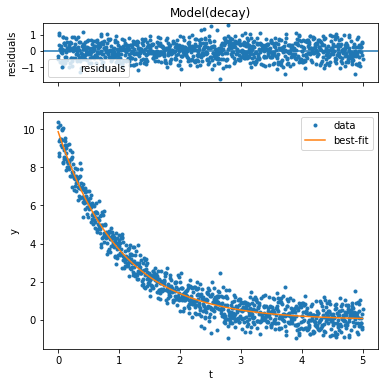

In [95]:
result.plot('.')

In [92]:
result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
N        9.86     -inf      inf  0.07014     True     None     None
tau     1.017     -inf      inf  0.01027     True     None     None


In the exercise above, we generated arrays _t_, _data_ and _noisy\_data_, but didn't place them in a pandas data frame. This can easily be accomplished by specifying a data frame with those arrays as the data:

In [130]:
import pandas as pd
d = {'t': t, 'data': noisy_data, 'init': result.init_fit, 'best_fit' : result.best_fit}  
# d contains several arrays, with headers
df = pd.DataFrame(data=d)
df.head()

,t,data,init,best_fit
0,0.000000,9.099422,5.000000,9.859675
1,0.005005,10.326944,4.991665,9.811255
2,0.010010,10.951151,4.983344,9.763073
3,0.015015,10.969271,4.975037,9.715128
4,0.020020,10.465762,4.966744,9.667418


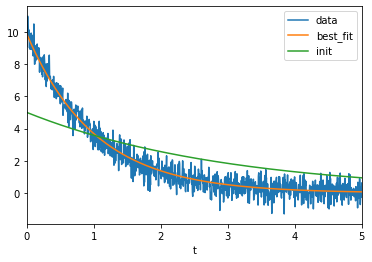

In [136]:
# df.plot(x='t', y=['data','best_fit'], kind='scatter', c='orange', s=1)
df.plot(x='t', y=['data','best_fit','init'])